In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def cox_ingersoll_rost(mean, adjustment_speed, volatility, num_of_time_steps, time_step):
    dW = np.sqrt(time_step) * np.random.randn(num_of_time_steps) # Brownian increments.
    x = np.zeros(num_of_time_steps)
    x[0] = mean
    for i in range(1, num_of_time_steps):
        x[i] = x[i - 1] + adjustment_speed * (mean - x[i - 1]) * time_step + volatility * np.sqrt(x[i - 1]) * dW[i - 1]
    return x

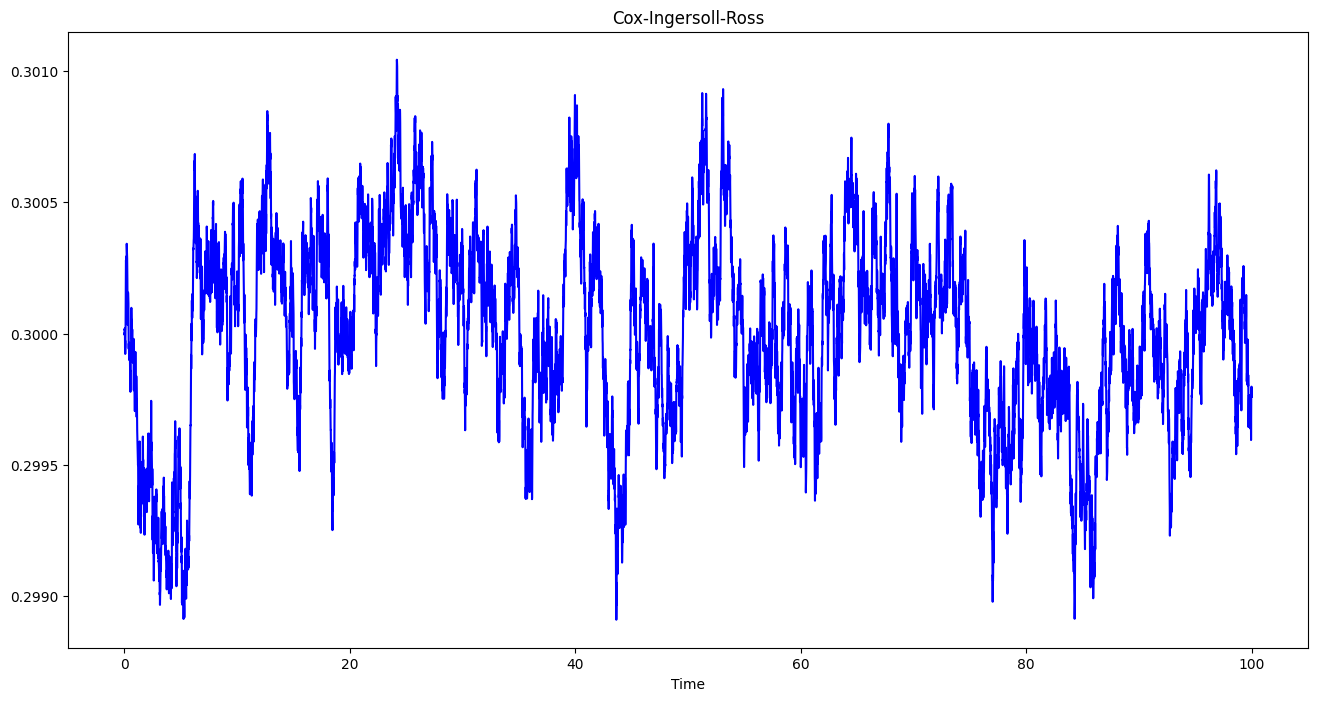

In [13]:
b =.3 # Mean.
a = 1 # Speed of adjustment to mean.
sigma = .001 # Volatility.

dt = .01 # Time step.
T = 100 # Total time.
n = int(T / dt) # Number of time steps.
t = np.linspace(0., T, n) # Vector of times

x = cox_ingersoll_rost(b, a, sigma, n, dt)
plt.figure(figsize=(16, 8))
plt.plot(t, x, linestyle = '-', color = 'blue')
plt.title('Cox-Ingersoll-Ross')
plt.xlabel('Time')
plt.show()

In [14]:
def basic_affine_jump_diffusion(
        mean,
        adjustment_speed,
        volatility,
        jump_intensity,
        jump_mean,
        total_time,
        time_step
    ):
    num_of_time_steps = int(total_time / time_step)
    time_vector = np.linspace(0., total_time, num_of_time_steps)

    n_jumps = np.random.poisson(lam = jump_intensity)
    jump_times = np.sort(np.random.uniform(low = 0, high = total_time, size = n_jumps))
    jump_sizes = np.random.exponential(scale = jump_mean, size = n_jumps)
    J = np.zeros(num_of_time_steps) # Jumps.
    for i in range(num_of_time_steps):
        J[i] = np.sum(jump_sizes[jump_times < time_vector[i]])
    dJ = np.insert(np.diff(J),0,0) # Jump increments.

    dW = np.sqrt(time_step) * np.random.randn(num_of_time_steps) # Brownian increments.
    x = np.zeros(num_of_time_steps)
    x[0] = mean
    for i in range(1, num_of_time_steps):
        x[i] = x[i - 1] + adjustment_speed * (mean - x[i - 1]) * time_step + volatility * np.sqrt(x[i - 1]) * dW[i - 1] + dJ[i - 1]
    return x

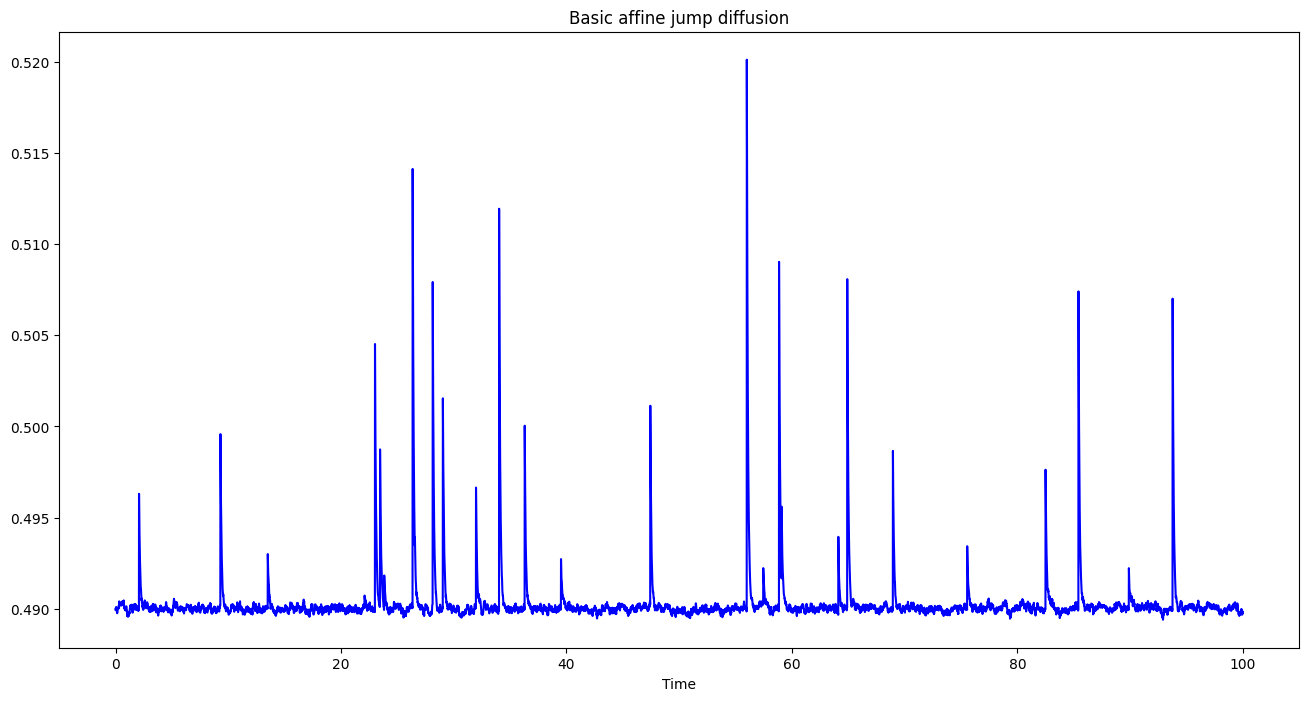

In [22]:
b =.49 # Mean.
a = 10 # Speed of adjustment to mean.
sigma = .001 # Volatility.

dt = .01 # Time step.
T = 100 # Total time.

l = 35 # Jump intensity.
mu = .01 # Jump mean.

x = basic_affine_jump_diffusion(b, a, sigma, l, mu, T, dt)
plt.figure(figsize=(16, 8))
plt.plot(t, x, linestyle = '-', color = 'blue')
plt.title('Basic affine jump diffusion')
plt.xlabel('Time')
plt.show()